If you work from collab, write "1" below, from pc - "0"

In [1]:
while True:
    print("Please Select if you want work from: \n 0 - home pc \n 1 - colab :") 
    selection = input()
    if selection == '0': 
        colab = 0
        print("You want work from pc")
        break
    elif selection =='1': 
        colab = 1
        print("You will work from colab\n")
        break
    else: 
        print("Unknown Option Selected! Only 0 or 1 accepted")

Please Select if you want work from: 
 0 - home pc 
 1 - colab :
You want work from pc


# Wikipedia: blocking of users and policies


##Useful libraries

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import csv 
import json

## Plot functions

In [3]:
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.color'] = 'gray'

In [4]:
def show_plot_1(x, y, my_title = "", my_xlabel = "", my_ylabel = ""):
    plt.figure(figsize=(21, 8))
    plt.plot(x, y)
    
    plt.title(my_title)
    plt.xlabel(my_xlabel)
    plt.ylabel(my_ylabel)

    plt.show()

In [5]:
def show_plot_2(x1,y1, x2,y2, my_title = "", my_xlabel = "", my_ylabel = "", legend_1="", legend_2=""):
    fig, ax = plt.subplots(figsize=(21, 8))
    
    ax.plot(x1, y1, color='blue')
    ax.plot(x2, y2, color='red')
    plt.legend([legend_1, legend_2], loc=0)

    plt.title(my_title)
    plt.xlabel(my_xlabel)
    plt.ylabel(my_ylabel)

    plt.show()

## Read files from colab/pc - select!

In [6]:
# if you run in colab - use this to connect to folders (which is not available now, would you please skip to the next block?)
print(colab)
if colab == 1:
    from google.colab import drive
    drive.mount('/content/drive/')
    # no space in the root name folder
    %cd drive/MyDrive/Wikipedia-Block-log/
    # path to the original data folder and results folder
    folder = 'data_original/' 
    folder_result = 'data_results/' 
elif colab == 0:
    # path to the original data folder and results folder
    folder = '../data_original/' 
    folder_result = '../data_results/' 

0


In [7]:
# path to the original data folder and results folder (for now)
folder = 'data_original/' 
folder_result = 'data_results/' 

In [8]:
file = 'freq_policies_monthly.csv'
freq_policies_monthly = pd.read_csv(folder + file)
freq_policies_monthly['month'] = pd.to_datetime(freq_policies_monthly['month'])

In [9]:
file = 'MonthlyEditAndEditorsFrom2004-2017.csv'
wiki_data_full = pd.read_csv(folder + file)

In [10]:
file = 'block_log_data_new.csv'
df = pd.read_csv(folder + file)
df['timestamp'] = pd.to_datetime(df['timestamp'])

/var/folders/n2/l02636fd7q11j3gyvhqqs5v80000gn/T/ipykernel_33811/129992704.py:2: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(folder + file)


### First glance at the data
When we first conducted our analysis (Dec 2022) our original dataframe had:
- 8 columns: title, action, user, timestamp, comment, duration, flags, expiry
- 4202626 entries (years 2004 to 2017)
- first timestamp: 2004-12-23 00:00:00, last timestamp: 2017-12-31 00:00:00

We later removed the year 2004 which held to few data to be relevant.

In [11]:
df.head()

,title,action,user,timestamp,comment,duration,flags,expiry
0,Angela,block,Angela,2004-12-23,Checking the block messages still work ok in 1.4,infinity,NaN,NaN
1,Dori,block,Dori,2004-12-23,testing,infinity,NaN,NaN
2,Brion VIBBER,block,Brion VIBBER,2004-12-23,testing,infinity,NaN,NaN
3,#13255,unblock,Angela,2004-12-23,me,NaN,NaN,NaN
4,#13254,unblock,Angela,2004-12-23,NaN,NaN,NaN,NaN


**title** = the user being blocked

**action** = block or unblock - we will only focus on block

**user** = the person (administrator) implementing the block

**timestamp** = the block event date

**comment** = blocking rationale

**duration** = blocking scheduled duration

**flag** = mysterious information

**expiry** = sometimes, a timestamp

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6424000 entries, 0 to 6423999
Data columns (total 8 columns):
 #   Column     Dtype         
---  ------     -----         
 0   title      object        
 1   action     object        
 2   user       object        
 3   timestamp  datetime64[ns]
 4   comment    object        
 5   duration   object        
 6   flags      object        
 7   expiry     object        
dtypes: datetime64[ns](1), object(7)
memory usage: 392.1+ MB


In [13]:
df.describe()

,timestamp
count,6424000
mean,2011-07-31 23:30:39.196514304
min,2004-12-23 00:00:00
25%,2008-02-26 00:00:00
50%,2010-11-02 00:00:00
75%,2015-02-16 00:00:00
max,2017-12-31 00:00:00


## H1: We expect the total number of blocks (normalized) to diminish over time.

In [14]:
# keeping only block events 
df_ac_block = df[df['action'] == 'block']

In [15]:
df_ac_block.tail()

,title,action,user,timestamp,comment,duration,flags,expiry
6423994,Surrpaws,block,Alexf,2017-12-31,{{uw-spamublock}},infinity,"['""nocreate""']",NaN
6423995,AspenSavannah,block,Alexf,2017-12-31,{{uw-softerblock}},infinity,"['""noautoblock""']",NaN
6423997,Lotaìn,block,GorillaWarfare,2017-12-31,[[WP:Vandalism-only account|Vandalism-only acc...,infinity,"['""nocreate""']",NaN
6423998,151.34.123.49,block,GorillaWarfare,2017-12-31,[[WP:Vandalism|Vandalism]],31 hours,"['""anononly""', ' ""nocreate""']",2018-01-02 04:33:08+00:00
6423999,Rald richie,block,Bbb23,2017-12-31,{{checkuserblock-account}}: Abusing [[WP:SOCK|...,infinity,"['""nocreate""']",NaN


In [16]:
df_ac_block.head()

,title,action,user,timestamp,comment,duration,flags,expiry
0,Angela,block,Angela,2004-12-23,Checking the block messages still work ok in 1.4,infinity,NaN,NaN
1,Dori,block,Dori,2004-12-23,testing,infinity,NaN,NaN
2,Brion VIBBER,block,Brion VIBBER,2004-12-23,testing,infinity,NaN,NaN
14,Angela,block,Angela,2004-12-23,checking changes to [[MediaWiki:Blocklogentry]],infinity,NaN,NaN
17,Cyrius,block,Angela,2004-12-23,complaining about the ugliness of the block log,infinity,NaN,NaN


In [17]:
# get unique titles
df_ac_block_monthly = df_ac_block.groupby(pd.PeriodIndex(df_ac_block['timestamp'], freq="M"))['title'].apply(lambda x: len(x.unique()))
df_ac_block_monthly = df_ac_block_monthly.to_frame()
df_ac_block_monthly = df_ac_block_monthly.reset_index()

In [18]:
df_ac_block_monthly.tail()

,timestamp,title
152,2017-08,57207
153,2017-09,53489
154,2017-10,62148
155,2017-11,55864
156,2017-12,48360


In [19]:
df_ac_block_monthly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype    
---  ------     --------------  -----    
 0   timestamp  157 non-null    period[M]
 1   title      157 non-null    int64    
dtypes: int64(1), period[M](1)
memory usage: 2.6 KB


In [20]:
df_ac_block_monthly['timestamp'] = df_ac_block_monthly['timestamp'].dt.to_timestamp()
df_ac_block_monthly = df_ac_block_monthly.rename(columns={"title": "blocked_people"})

In [21]:
df_ac_block_monthly.head()

,timestamp,blocked_people
0,2004-12-01,194
1,2005-01-01,957
2,2005-02-01,1209
3,2005-03-01,721
4,2005-04-01,630


In [22]:
wiki_data_full.head()

,month,edits,editors
0,2004-01-01T00:00:00.000Z,218853,14858
1,2004-02-01T00:00:00.000Z,310206,19883
2,2004-03-01T00:00:00.000Z,440685,26881
3,2004-04-01T00:00:00.000Z,405181,26519
4,2004-05-01T00:00:00.000Z,420408,28361


In [23]:
wiki_data_full.dtypes

month      object
edits       int64
editors     int64
dtype: object

In [24]:
wiki_data_full['month'] = pd.to_datetime(wiki_data_full['month'])
wiki_data = wiki_data_full[wiki_data_full['month'] >= '2005-01-01']
wiki_data['month'] = wiki_data['month'].dt.date
wiki_data.reset_index(drop=True, inplace=True)

/var/folders/n2/l02636fd7q11j3gyvhqqs5v80000gn/T/ipykernel_33811/863895135.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wiki_data['month'] = wiki_data['month'].dt.date


In [25]:
df_ac_block_monthly = df_ac_block_monthly[df_ac_block_monthly['timestamp'] >= '2005-01-01']

block_vs_edits = df_ac_block_monthly.copy()
block_vs_edits.reset_index(drop=True, inplace=True)

Check the equality of lenght of time frame from 2005 to 2017 for 12 month. from wiki data (edits and editors and data about blocking)



In [26]:
if len(wiki_data) != len(df_ac_block_monthly):
    print("data time frame ERROR")
else:
    print(len(wiki_data))

156


In [27]:
df1 = wiki_data
df4 = block_vs_edits
result = pd.concat([df1, df4], axis=1, join="inner")
result = result.drop(columns = 'timestamp')

In [28]:
result['%_bl_users'] = result['blocked_people']*100/result['editors']
result['%_bl_users'] = result['%_bl_users'].round(0)

In [29]:
result.head()

,month,edits,editors,blocked_people,%_bl_users
0,2005-01-01,800186,80201,957,1.0
1,2005-02-01,789780,75824,1209,2.0
2,2005-03-01,1024707,92355,721,1.0
3,2005-04-01,1294737,113549,630,1.0
4,2005-05-01,1365329,125997,597,0.0


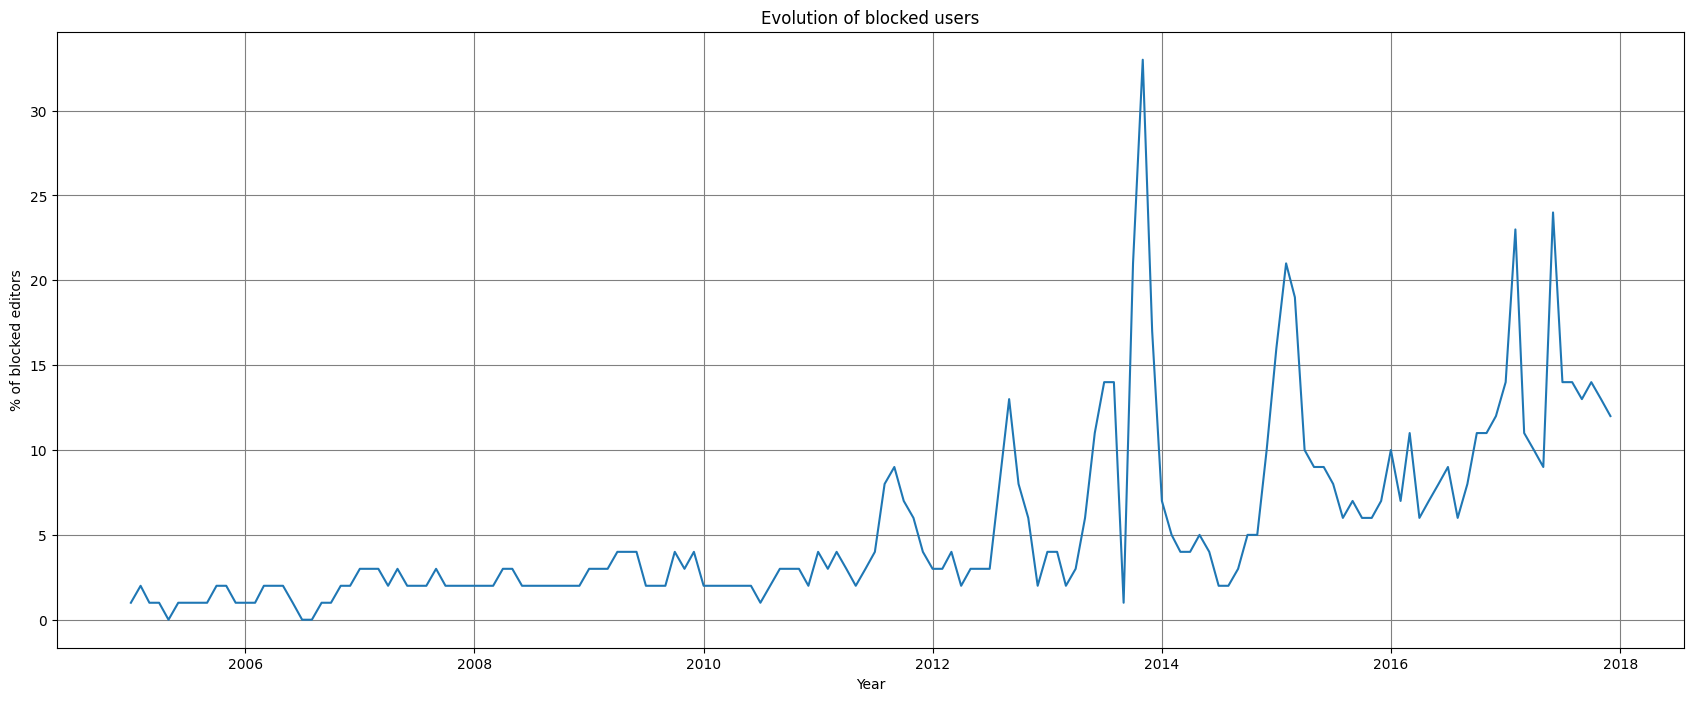

In [30]:
x1 = result['month']
y1 = result['%_bl_users']
title = "Evolution of blocked users"
xlabel = "Year"
ylabel = "% of blocked editors"
show_plot_1(x1, y1, title, xlabel, ylabel)

In [31]:
freq_policies_monthly.head()

,month,nb_policies
0,2005-01-01,28
1,2005-02-01,28
2,2005-03-01,28
3,2005-04-01,29
4,2005-05-01,29


In [32]:
result_rn = freq_policies_monthly.rename(columns={"month": "date"})
df1 = result
df4 = result_rn
result_h1 = pd.concat([df1, df4], axis=1, join="inner")
result_h1 = result_h1.drop(columns = 'date')

In [33]:
result_h1.head()

,month,edits,editors,blocked_people,%_bl_users,nb_policies
0,2005-01-01,800186,80201,957,1.0,28
1,2005-02-01,789780,75824,1209,2.0,28
2,2005-03-01,1024707,92355,721,1.0,28
3,2005-04-01,1294737,113549,630,1.0,29
4,2005-05-01,1365329,125997,597,0.0,29


In [34]:
result_h1.tail()

,month,edits,editors,blocked_people,%_bl_users,nb_policies
151,2017-08-01,4686591,399409,57207,14.0,58
152,2017-09-01,4666223,398494,53489,13.0,58
153,2017-10-01,4696462,436203,62148,14.0,58
154,2017-11-01,4622820,434451,55864,13.0,59
155,2017-12-01,4797589,409054,48360,12.0,59


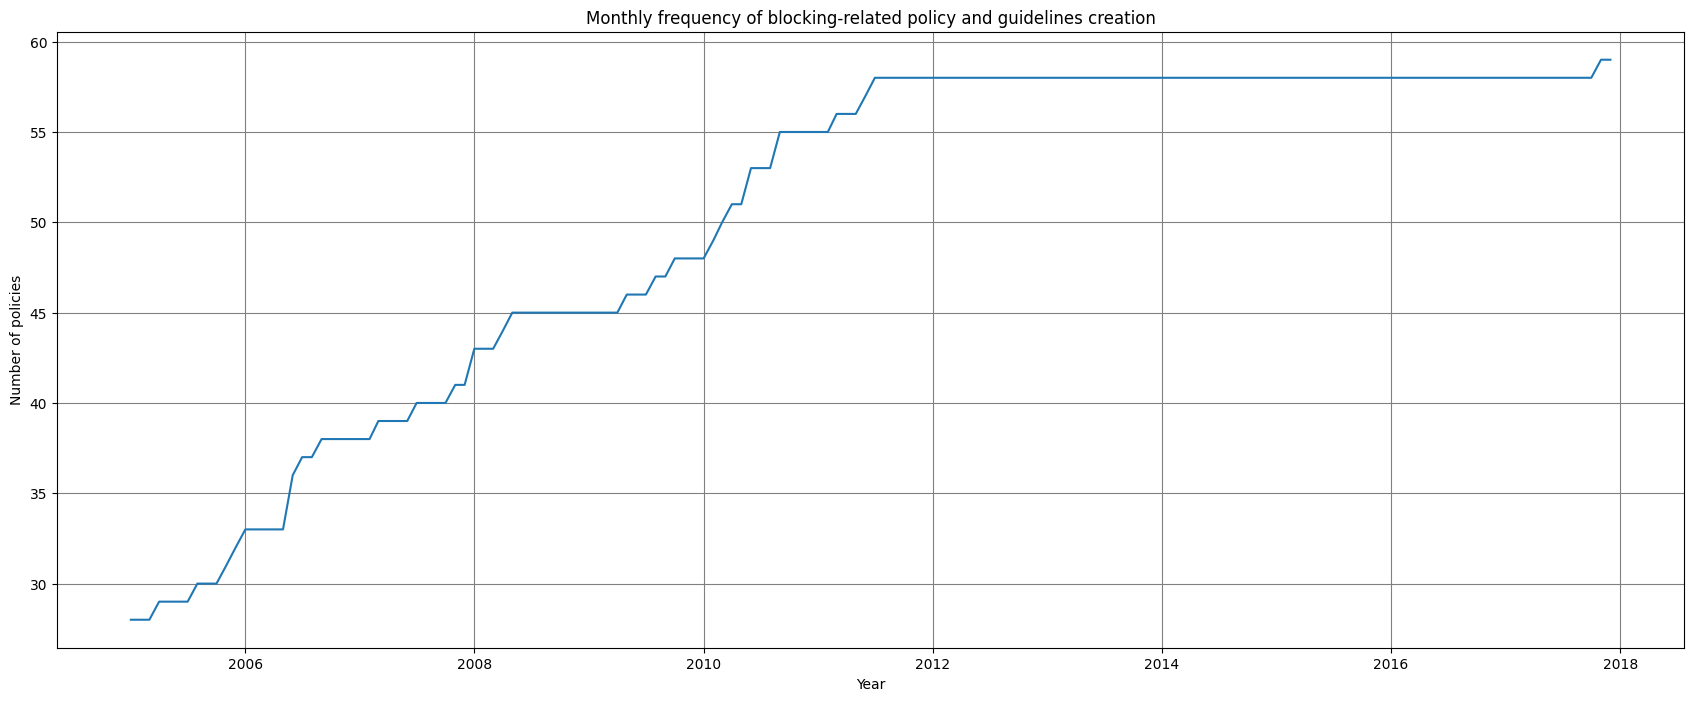

In [35]:
x2 = result_h1['month']
y2 = result_h1['nb_policies']
title = "Monthly frequency of blocking-related policy and guidelines creation"
xlabel = "Year"
ylabel = "Number of policies"
show_plot_1(x2, y2, title, xlabel, ylabel)

Monthly % of blocked editors (users) from total number of editors per that time - **date**

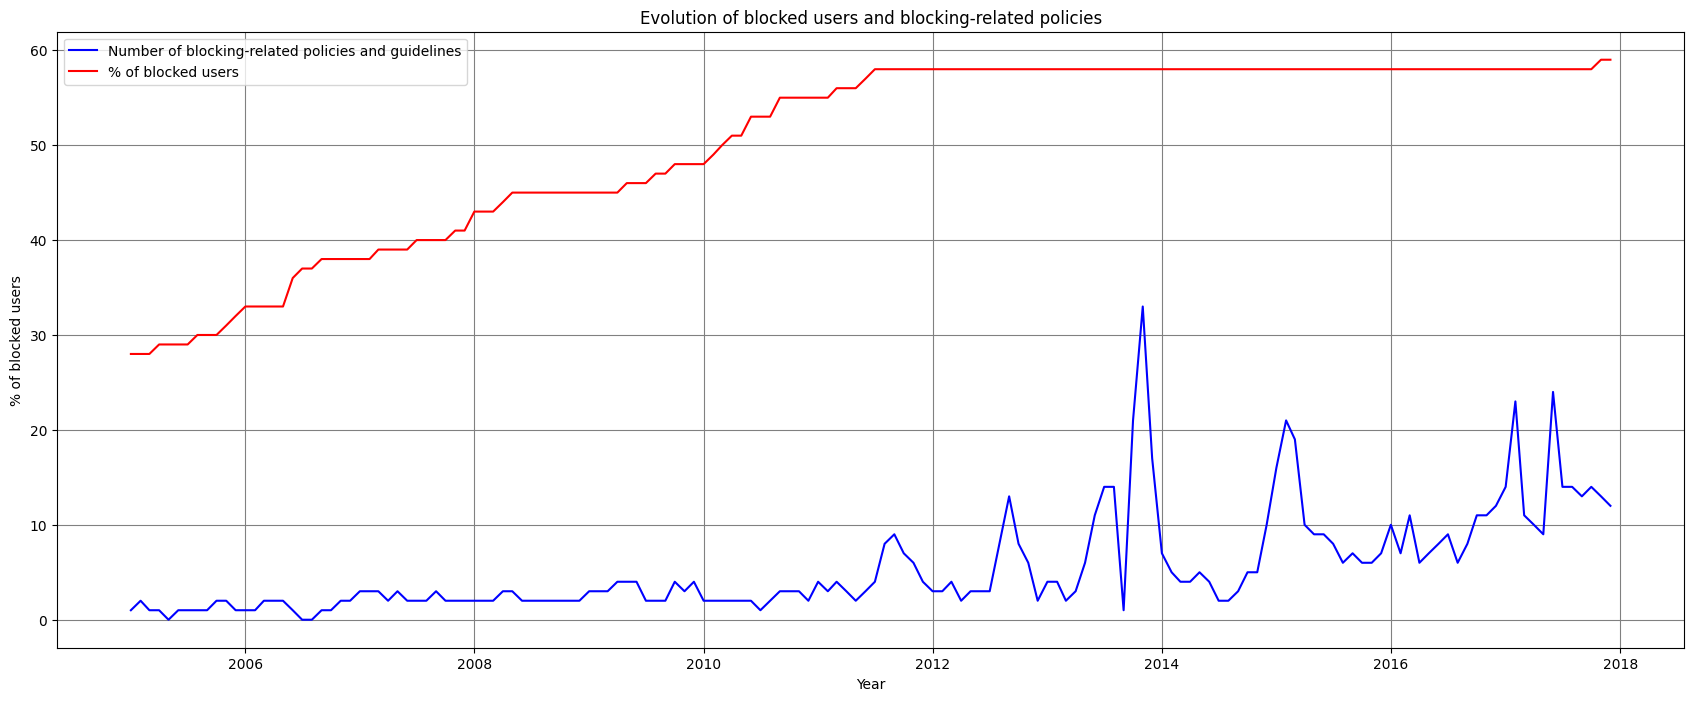

In [36]:
title = "Evolution of blocked users and blocking-related policies"
xlabel = "Year"
ylabel = "% of blocked users"
legend_1 = "Number of blocking-related policies and guidelines" #Blue
legend_2 = "% of blocked users" #Red
show_plot_2(x1, y1, x2, y2, title, xlabel, ylabel, legend_1, legend_2)

In [37]:
# saving
file_name = 'evolution_of_blocking.csv'
result_h1.to_csv(folder_result + file_name)

## H2: We expect the rationale for blocking to stabilize over time.

Working with tags

In [38]:
# tags since 2007
tags = 'Vandalism**Vandalism-only**Copyright**Attack**Biographies**Citing**Patent**Spam**promotion**NOTADVERTISING**advertising**Spam**Promotion**Edit warring**Three-revert**Disruptive editing**Harassment**No legal threats**legal threats**Arbitration**Evasion**Sockpuppetry**multiple accounts**Edit filter**Long-term abuse**NOTHERE**{{anonblock}}**{{school block}}**{{rangeblock}}**{{blocked proxy}}**{{uw-ublock}}**{{uw-uhblock}}**{{uw-causeblock}}**{{uw-ublock-wellknown}}**{{uw-ublock-double}}**{{uw-uhblock-double}}**{{uw-softerblock}}**{{uw-spamublock}}**{{Uw-spamblacklistblock}}**{{uw-vaublock}}**{{CheckUser block}}**{{checkuserblock-wide}}**{{checkuserblock-account}}**{{Tor}}**{{webhostblock}}**{{colocationwebhost}}**{{OversightBlock}}'
tags = tags.lower()
tags = tags.split('**')
tags[:5]

['vandalism', 'vandalism-only', 'copyright', 'attack', 'biographies']

In [39]:
def tagMatch(x):
  if any((match := substring) in x.lower() for substring in tags):
    return match
  else:
    return None
df['comment'] = df['comment'].astype(str)
df['tag'] = df['comment'].apply(lambda x: tagMatch(x))
nb_tag_uniq = df['tag'].value_counts()

In [40]:
print(len(nb_tag_uniq))
nb_tag_uniq

41


tag
{{blocked proxy}}             2638869
vandalism                     1463019
spam                           259798
multiple accounts              150846
{{anonblock}}                  104141
evasion                         64964
disruptive editing              61371
attack                          54351
{{school block}}                47778
{{tor}}                         42609
edit warring                    30054
{{checkuserblock-account}}      29292
promotion                       24205
{{uw-softerblock}}              24100
{{uw-ublock}}                   21127
edit filter                     12436
{{uw-uhblock}}                  12223
nothere                         10514
biographies                     10256
copyright                       10018
long-term abuse                  8944
harassment                       7293
three-revert                     6806
patent                           4559
sockpuppetry                     4036
{{uw-vaublock}}                  3669
arbitrat

In [41]:
df_block_uniq_tag = df[df['action']=='block']
df_comments = df_block_uniq_tag.groupby([df_block_uniq_tag['timestamp'].dt.year, df_block_uniq_tag['tag']]).count()

In [42]:
df_com_copy = df_comments.copy()

In [43]:
df_comments.head()

title  action  user  timestamp  comment  duration  \
timestamp tag                                                              
2004      attack           4       4     4          4        4         4   
          spam            13      13    13         13       13        13   
          vandalism      118     118   118        118      118       118   
2005      advertising      9       9     9          9        9         9   
          arbitration     74      74    74         74       74        74   

                       flags  expiry  
timestamp tag                         
2004      attack           0       0  
          spam             0       0  
          vandalism        0       0  
2005      advertising      0       8  
          arbitration      0      53

In [44]:
df_comments.tail()

title  action  user  timestamp  comment  \
timestamp tag                                                              
2017      {{uw-ublock}}           2342    2342  2342       2342     2342   
          {{uw-uhblock-double}}     19      19    19         19       19   
          {{uw-uhblock}}          2517    2517  2517       2517     2517   
          {{uw-vaublock}}          192     192   192        192      192   
          {{webhostblock}}         542     542   542        542      542   

                                 duration  flags  expiry  
timestamp tag                                             
2017      {{uw-ublock}}              2342   2332       0  
          {{uw-uhblock-double}}        19     19       0  
          {{uw-uhblock}}             2517   2517       0  
          {{uw-vaublock}}             192    192       0  
          {{webhostblock}}            542    541     538

In [45]:
# start from 2005
n = 5 # to delete 2004
df_comments.drop(index=df_comments.index[:n], axis=0, inplace=True)

In [46]:
df_comments.head()

title  action  user  timestamp  comment  \
timestamp tag                                                           
2005      attack                341     341   341        341      341   
          citing                  1       1     1          1        1   
          copyright              30      30    30         30       30   
          disruptive editing      1       1     1          1        1   
          edit warring           26      26    26         26       26   

                              duration  flags  expiry  
timestamp tag                                          
2005      attack                   341      0     260  
          citing                     1      0       1  
          copyright                 30      0      26  
          disruptive editing         1      0       1  
          edit warring              26      0      17

In [47]:
df_comments_yearly = df_comments['action']
df_comments_yearly = df_comments_yearly.rename_axis(['year','tag']).reset_index()

In [48]:
df_comments_yearly.head()

,year,tag,action
0,2005,attack,341
1,2005,citing,1
2,2005,copyright,30
3,2005,disruptive editing,1
4,2005,edit warring,26


In [49]:
df_comments_yearly.tail()

,year,tag,action
418,2017,{{uw-ublock}},2342
419,2017,{{uw-uhblock-double}},19
420,2017,{{uw-uhblock}},2517
421,2017,{{uw-vaublock}},192
422,2017,{{webhostblock}},542


In [50]:
# saving
file_name_q = 'data_qualitative.csv'
df_comments_yearly.to_csv(folder_result + file_name_q)

In [51]:
data = {}

for index, row in df_comments_yearly.iterrows():
    year = row['year']
    tag = row['tag']
    nb_actions_per_tag__this_year = row['action']
    
    if tag not in data:
        data[tag] = year
        print(tag, data[tag])

attack 2005
citing 2005
copyright 2005
disruptive editing 2005
edit warring 2005
evasion 2005
harassment 2005
legal threats 2005
multiple accounts 2005
no legal threats 2005
patent 2005
promotion 2005
sockpuppetry 2005
spam 2005
three-revert 2005
vandalism 2005
{{blocked proxy}} 2005
advertising 2006
arbitration 2006
biographies 2006
long-term abuse 2006
{{anonblock}} 2006
{{school block}} 2006
{{tor}} 2006
{{checkuser block}} 2007
{{checkuserblock-account}} 2007
{{rangeblock}} 2007
{{uw-ublock}} 2007
{{uw-uhblock}} 2007
nothere 2008
{{uw-vaublock}} 2008
edit filter 2009
{{uw-softerblock}} 2009
{{uw-uhblock-double}} 2010
{{uw-causeblock}} 2011
{{uw-ublock-double}} 2011
{{webhostblock}} 2012
{{colocationwebhost}} 2013
{{oversightblock}} 2013
notadvertising 2014
{{checkuserblock-wide}} 2014


In [52]:
print(len(data))

41


In [53]:
rows = []
for tag, year in data.items():
    rows.append({'year': year, 'tag': tag})

tags_invention = pd.DataFrame(rows)

Year of tag creation

In [54]:
tags_invention.tail(10)

,year,tag
31,2009,edit filter
32,2009,{{uw-softerblock}}
33,2010,{{uw-uhblock-double}}
34,2011,{{uw-causeblock}}
35,2011,{{uw-ublock-double}}
36,2012,{{webhostblock}}
37,2013,{{colocationwebhost}}
38,2013,{{oversightblock}}
39,2014,notadvertising
40,2014,{{checkuserblock-wide}}


In [55]:
tags_count_new_year = tags_invention.groupby(['year'])['tag'].count()

In [56]:
rows = []
total_sum = 0
for year, count in tags_count_new_year.items():
    total_sum += count
    rows.append({'year': year, 'count_dropdown_tags': count, 'frequencies_dropdown_tags':total_sum})

df_tags_count_new_year = pd.DataFrame(rows)

Tags frequencies

In [57]:
df_tags_count_new_year

,year,count_dropdown_tags,frequencies_dropdown_tags
0,2005,17,17
1,2006,7,24
2,2007,5,29
3,2008,2,31
4,2009,2,33
5,2010,1,34
6,2011,2,36
7,2012,1,37
8,2013,2,39
9,2014,2,41


In [58]:
# saving
file_name = 'year_count_freq.csv'
df_tags_count_new_year.to_csv(folder_result + file_name)

In [59]:
df_block_uniq_tag.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6111944 entries, 0 to 6423999
Data columns (total 9 columns):
 #   Column     Dtype         
---  ------     -----         
 0   title      object        
 1   action     object        
 2   user       object        
 3   timestamp  datetime64[ns]
 4   comment    object        
 5   duration   object        
 6   flags      object        
 7   expiry     object        
 8   tag        object        
dtypes: datetime64[ns](1), object(8)
memory usage: 466.3+ MB


### Blocklog tags

In [60]:
df_block_uniq_tag.head()

,title,action,user,timestamp,comment,duration,flags,expiry,tag
0,Angela,block,Angela,2004-12-23,Checking the block messages still work ok in 1.4,infinity,NaN,NaN,None
1,Dori,block,Dori,2004-12-23,testing,infinity,NaN,NaN,None
2,Brion VIBBER,block,Brion VIBBER,2004-12-23,testing,infinity,NaN,NaN,None
14,Angela,block,Angela,2004-12-23,checking changes to [[MediaWiki:Blocklogentry]],infinity,NaN,NaN,None
17,Cyrius,block,Angela,2004-12-23,complaining about the ugliness of the block log,infinity,NaN,NaN,None


In [61]:
df_ac_block_tag_n_y = df_block_uniq_tag[pd.isnull(df_block_uniq_tag['tag'])].groupby(df_block_uniq_tag['timestamp'].dt.year).size().reset_index(name='count')
df_ac_block_tag_n_y.drop(index = df_ac_block_tag_n_y.index[0], axis=0, inplace=True)
df_ac_block_tag_n_y = df_ac_block_tag_n_y.reset_index()
df_ac_block_tag_n_y = df_ac_block_tag_n_y.drop(columns = 'index')
df_ac_block_tag_n_y = df_ac_block_tag_n_y.rename(columns={"count": "count_none_tag", "timestamp": "year"})

In [62]:
df_ac_block_tag_n_y

,year,count_none_tag
0,2005,15422
1,2006,154820
2,2007,372608
3,2008,269980
4,2009,82046
5,2010,34102
6,2011,24781
7,2012,22123
8,2013,21799
9,2014,20764


In [63]:
df1 = df_ac_block_tag_n_y
df4 = df_tags_count_new_year
df_none_tag_yearly = pd.merge(df1, df4, how="outer",  left_on='year', right_on='year')
df_none_tag_yearly[['count_dropdown_tags','frequencies_dropdown_tags']] = df_none_tag_yearly[['count_dropdown_tags','frequencies_dropdown_tags']].fillna(0)

### None tag yearly

In [64]:
df_none_tag_yearly

,year,count_none_tag,count_dropdown_tags,frequencies_dropdown_tags
0,2005,15422,17.0,17.0
1,2006,154820,7.0,24.0
2,2007,372608,5.0,29.0
3,2008,269980,2.0,31.0
4,2009,82046,2.0,33.0
5,2010,34102,1.0,34.0
6,2011,24781,2.0,36.0
7,2012,22123,1.0,37.0
8,2013,21799,2.0,39.0
9,2014,20764,2.0,41.0


### Bar plot

In [65]:
x = df_none_tag_yearly['year']
y = df_none_tag_yearly['count_none_tag']
y2 = df_none_tag_yearly['frequencies_dropdown_tags']

title = "Yearly occurences of None tag in blocking rationale (from dropdown menu)"
xlabel = "Year"
ylabel = "Number of None tags"

In [66]:
import matplotlib as mpl
from matplotlib.ticker import MaxNLocator

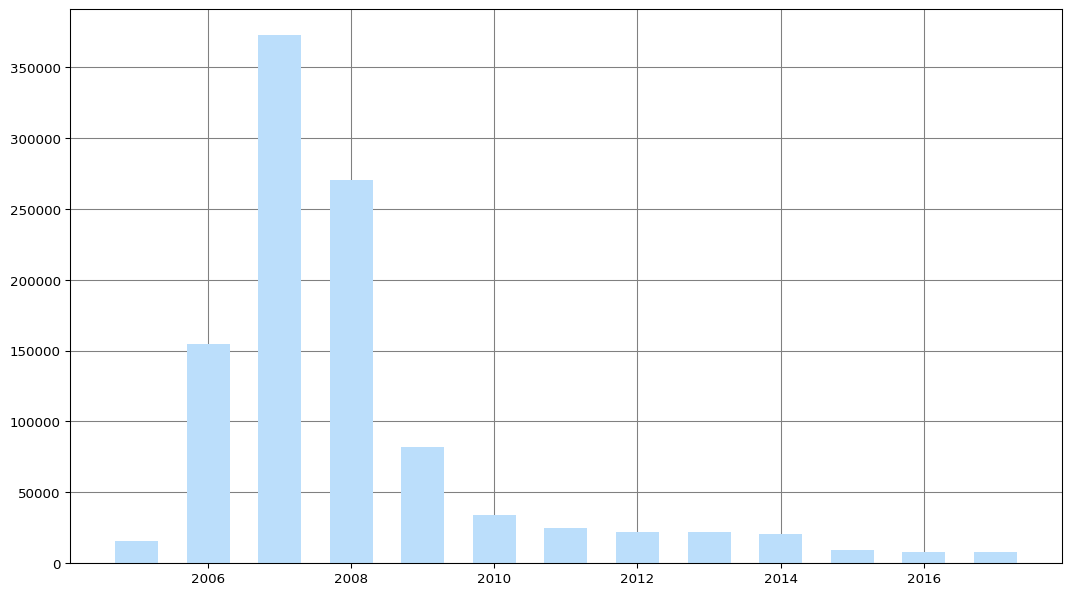

In [67]:
colours = ["#2196f3", "#bbdefb"]

# Colormap - Build the colour maps
cmap = mpl.colors.LinearSegmentedColormap.from_list("colour_map", colours, N=256)
# norm = mpl.colors.Normalize(y.min(), y.max()) # linearly normalizes data into the [0.0, 1.0] interval
fig, ax = plt.subplots(figsize=(13.33,7.5), dpi = 96)

# Plot bars
# bar1 = ax.bar(x, y, color=cmap(norm(y)), width=0.6, zorder=2)
bar1 = ax.bar(x, y, color=cmap(y), width=0.6, zorder=2)

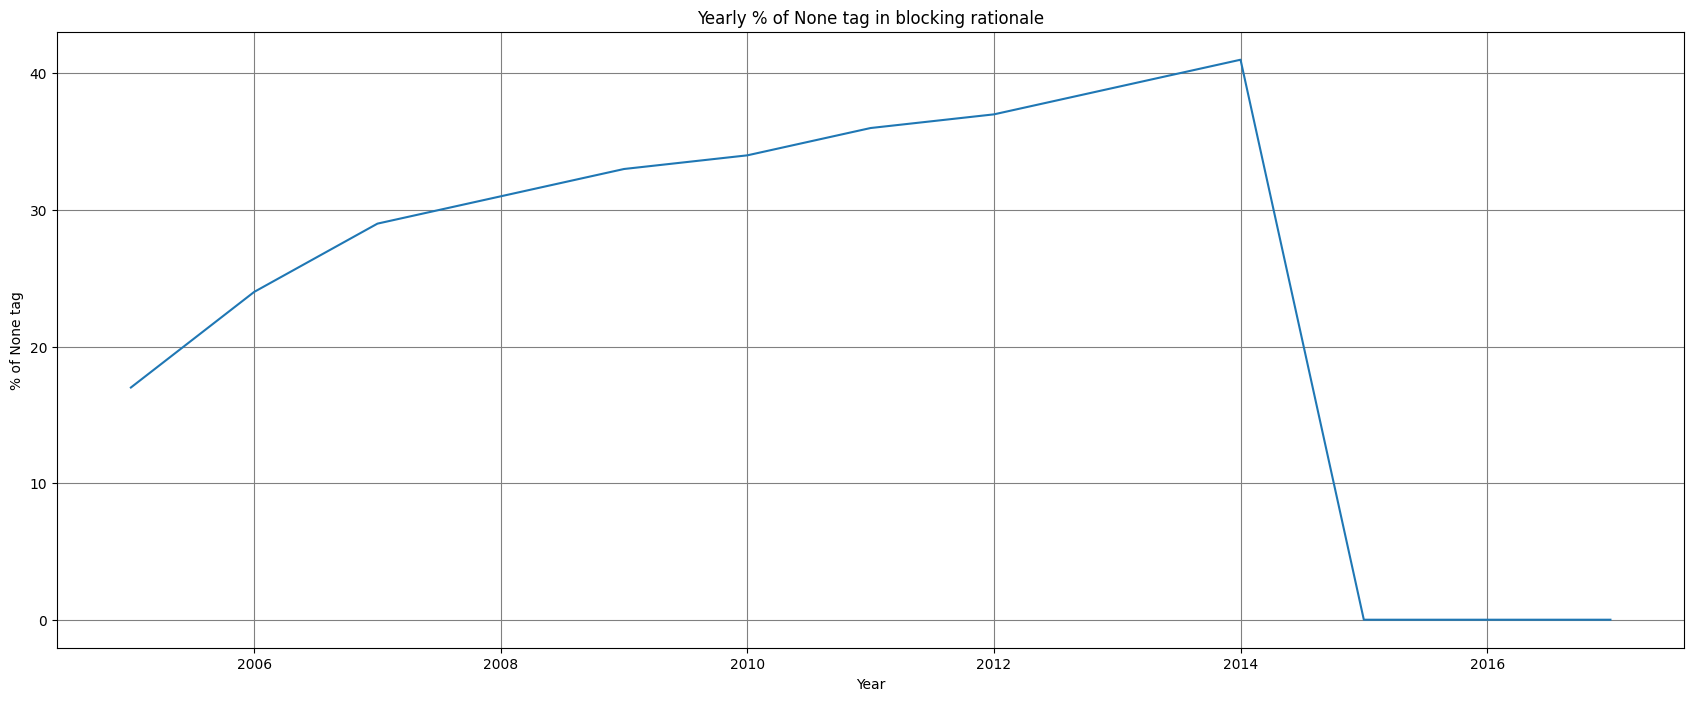

In [68]:
title = "Yearly % of None tag in blocking rationale"
xlabel = "Year"
ylabel = "% of None tag"
show_plot_1(x, y2, title, xlabel, ylabel)

In [69]:
# saving
file_name = 'NoneTagYearly.csv'
df_none_tag_yearly.to_csv(folder_result + file_name)